# Document Summary

The target data is displayed and the imbalance is acknowledged.

Feature Data is pre processed 4 ways to cover all combinations of lemmatization, stemmatization, CountVectorization
and RFID Vectorization.

An initial LinearRegression model shows correlation between all preprocessed data and the target data, but this correlation
is not supported by the RSquared value.

All data is resampled using RandomUndersampler and all correlation is lost.

Document concludes that further investigation should follow regularization, non linear regression modelling and consider 
classification


# Initial Regression Modelling

## Uncut data Linear regression Parameters

These values were taken from the values of the LinearRegression before the values were cut into rounded integer values, the errors here, especially the R Squared, show the amount of error produced by the values as floats. It should also be noted that in the cut process we started with min/max edges at -10/10, but there were a large number of NaN values produced which prevented the classification report from running, so these were modified to include the min max values of the series. A large amount of error could be contained there. The equations that generated these numbers have now been removed from the notebook.

| Tokenization | Vectorization | Coefficient | R Squared |
|----------|----------|----------|----------|
| Lemmatized | Count Vectorized | 0.816 | -6.49 |
| Lemmatized | TFIDF Vectorized | 0.849 | -1.40 |
| Stemmatized | Count Vectorized | 0.744 | -.98 |
| Stemmatized | TFIDF Vectorized | 0.793 | -0.35 |

Across the board it can be seen that the RSquared values are not supporting the detected regression lines.

## Linear Regression Parameters after cutting

| Data Type | Train/Test | Coefficient | R Squared | P Value | Precision | Recall | F1 | Geometric Mean |
|----------|----------|----------|----------|----------|----------|----------|----------|----------|
| Lemmatized Count Vectorized | Train | 1.041 | 0.906 | 0.0 | 0.70 | 0.68 | 0.66 | 0.76 |
| Lemmatized Count Vectorized | Test | 0.550 | 0.484 | 0.0 | 0.33 | 0.37 | 0.33 | 0.50 |
| Lemmatized TFIDF Vectorized | Train | 1.031 | 0.921 | 0.0 | 0.71 | 0.71 | 0.69 | 0.78 |
| Lemmatized TFIDF Vectorized | Test | 0.641 | 0.549 | 0.0 | 0.35 | 0.39 | 0.35 | 0.51 |
| Stemmatized Count Vectorized | Train | 1.053 | 0.867 | 0.0 | 0.62 | 0.59 | 0.55 | 0.69 |
| Stemmatized Count Vectorized | Test | 0.670 | 0.544 | 0.0 | 0.34 | 0.35 | 0.31 | 0.49 |
| Stemmatized TFIDF Vectorized | Train | 1.035 | 0.890 | 0.0 | 0.67 | 0.64 | 0.60 | 0.72 |
| Stemmatized TFIDF Vectorized | Test | 0.755 | 0.612 | 0.0 | 0.37 | 0.39 | 0.34 | 0.52 |

Cutting the data has significantly improved the R Squared scores at the cost of the coefficient.  
The highest scoring data is the Stemmatized TFIDF Vectorized data with the highest coefficient and R Squared value across both training and test data. It scores similar to the other datasets in terms of recall, precision and f1 score and has the highest test Geometric mean by a narrow margin.

### Stemmatized TFIDF Vectorized Test Data Confusion Matrix

| Predicted Values | 1 | 2 | 3 | 4 | 5 |
|----------|----------|----------|----------|----------|----------|
| **Real Values** |  |  |  |  |  |
| **1**| 1680 | 244 | 149 | 103 | 262 |
| **2**| 1519 | 370 | 279 | 223 | 417 |
| **3**| 1004 | 381 | 508 | 622 | 1274 |
| **4**| 383 | 182 | 358 | 884 | 2615 |
| **5**| 188 | 99 | 183 | 748 | 3772 |


## Linear Regression Parameters after Under Sampling and cutting

| Data Type | Train/Test | Coefficient | R Squared | P Value | Precision | Recall | F1 | Geometric Mean |
|----------|----------|----------|----------|----------|----------|----------|----------|----------|
| Lemmatized Count Vectorized | Train | 0.360 | 0.357 | 0.0 | 0.63 | 0.60 | 0.61 | 0.70 |
| Lemmatized Count Vectorized | Test | 0.139 | 0.150 | 2.2 | 0.39 | 0.36 | 0.37 | 0.48 |
| Lemmatized TFIDF Vectorized | Train | 0.377 | 0.367 | 0.0 | 0.63 | 0.59 | 0.59 | 0.69 |
| Lemmatized TFIDF Vectorized | Test | 0.148 | 0.157 | 1.2 | 0.36 | 0.35 | 0.35 | 0.47 |
| Stemmatized Count Vectorized | Train | 0.572 | 0.500 | 0.0 | 0.58 | 0.52 | 0.51 | 0.64 |
| Stemmatized Count Vectorized | Test | 0.350 | 0.327 | 0.0 | 0.31 | 0.33 | 0.31 | 0.47 |
| Stemmatized TFIDF Vectorized | Train | 0.643 | 0.550 | 0.0 | 0.59 | 0.52 | 0.50 | 0.64 |
| Stemmatized TFIDF Vectorized | Test | 0.429 | 0.385 | 0.0 | 0.31 | 0.34 | 0.31 | 0.48 |

Sampling with the RandomUnderSampler has had a surprisingly bad effect on the datasets. All scores have been lowered, which is a great surprise. Looking at the graph below a clear imbalance is visible with ratings 1 and 5 have the lions share of the data, so it would be expected that the resampling would improve the scores. (5 has 45.2% of the rows, 1 has 26.7%)

![Graph showing target data 'overall' Distribution](../amazon_review/images/RatingDistribution.png)

### Resampled Stemmatized TFIDF Vectorized Test Data Confusion Matrix

| Predicted Values | 1 | 2 | 3 | 4 | 5 |
|----------|----------|----------|----------|----------|----------|
| **Real Values** |  |  |  |  |  |
| **1**| 1940 | 374 | 331 | 410 | 1067 |
| **2**| 1083 | 256 | 267 | 294 | 767 |
| **3**| 795 | 274 | 370 | 512 | 1425 |
| **4**| 421 | 165 | 238 | 561 | 1880 |
| **5**| 535 | 207 | 271 | 803 | 3201 |

This indicates that the Linear Regression model is not the best fit for the data in its current state. There are options at this point. Regularisation is a good option to elimnate some of the data causing noise in the predcitions. More complex regression models can also be employed to better fit the  data. Both have the risk of overfitting the data This risk will be further assessed later in the project.

In [1]:
from TextMiningProcesses import column_lemmatizer, column_stemmatizer, count_vectorize_data, tfidf_vectorize_data

import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from imblearn.metrics import classification_report_imbalanced
from imblearn.under_sampling import RandomUnderSampler
from matplotlib import pyplot as pyplot
from scipy.stats import linregress
import seaborn as sns


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

X_train = train.drop(columns='overall')
y_train = train['overall']
X_test = test.drop(columns='overall')
y_test = test['overall']


# Identify the column to be processed
X_train.info() # reviewText is the column name


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43043 entries, 0 to 43042
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   vote            43043 non-null  int64 
 1   verified        43043 non-null  bool  
 2   reviewTime      43043 non-null  object
 3   reviewerID      43043 non-null  object
 4   asin            43043 non-null  object
 5   reviewerName    43043 non-null  object
 6   reviewText      43043 non-null  object
 7   summary         43043 non-null  object
 8   unixReviewTime  43043 non-null  int64 
 9   reviewYear      43043 non-null  int64 
 10  reviewMonth     43043 non-null  int64 
 11  reviewDay       43043 non-null  int64 
 12  category        43043 non-null  object
 13  description     43043 non-null  object
 14  title           43043 non-null  object
 15  brand           42533 non-null  object
 16  feature         43043 non-null  object
 17  rank            43043 non-null  object
 18  main_c

<class 'pandas.core.series.Series'>
RangeIndex: 43043 entries, 0 to 43042
Series name: overall
Non-Null Count  Dtype
--------------  -----
43043 non-null  int64
dtypes: int64(1)
memory usage: 336.4 KB


overall
5    0.452013
1    0.267035
4    0.134377
3    0.077411
2    0.069163
Name: proportion, dtype: float64

c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


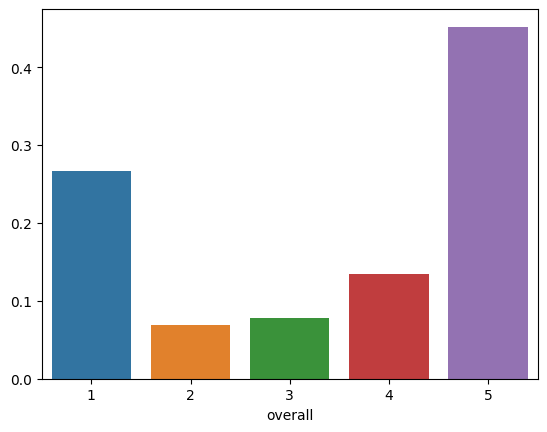

In [3]:
y_train.info()

normalized_counts = y_train.value_counts(normalize=True)

display(y_train.value_counts(normalize=True))

sns.barplot(x=normalized_counts.index, y = normalized_counts.values);

We can see that the data is not very well balanced and may wish to consider over or undersampling the data. from the size of the data it may be best to undersample.

In [4]:
"""
With two methods of tokenizing ands 2 methods of vectorizing the text fields, that gives us 4 potential cobinations to test the regression.
To test the regression we can use the LinearRegression model to check for a linear regression and we can use the crossvalidation to verify
any detected linear relationships.

First though we must identify and preprocess our 4 types of data

This cell could take a few minutes to run.
"""

# Lemmatized data
X_lem_train = column_lemmatizer(X_train['reviewText'])
X_lem_test = column_lemmatizer(X_test['reviewText'])

# Stemmatized data
X_stem_train = column_stemmatizer(X_train['reviewText'])
X_stem_test = column_stemmatizer(X_test['reviewText'])

# Lemmatized CountVectorized data
X_lem_CV_train, X_lem_CV_test = count_vectorize_data(X_lem_train, X_lem_test)

# Lemmatized TFIDFVectorized data
X_lem_RFID_train, X_lem_RFID_test = tfidf_vectorize_data(X_lem_train, X_lem_test)

# Stemmatized CountVectorized data
X_stem_CV_train, X_stem_CV_test = count_vectorize_data(X_stem_train, X_stem_test)

# Stemmatized TFIDFVectorized data
X_stem_RFID_train, X_stem_RFID_test = tfidf_vectorize_data(X_stem_train, X_stem_test)



In [5]:
# Lemmatized, CountVectorized LinearRegression results
lr_l_cv = LinearRegression()
lr_l_cv.fit(X_lem_CV_train, y_train)

# Make Predictions
y_train_l_cv_pred = lr_l_cv.predict(X_lem_CV_train)
y_test_l_cv_pred = lr_l_cv.predict(X_lem_CV_test)

# Cut predictions into integers
y_train_l_cv_pred_cut = pd.cut(x=y_train_l_cv_pred, bins=[y_test_l_cv_pred.min(),1.5,2.5,3.5,4.5,y_test_l_cv_pred.max()], labels=[1,2,3,4,5], include_lowest=True)
y_test_l_cv_pred_cut = pd.cut(x=y_test_l_cv_pred, bins=[y_test_l_cv_pred.min(),1.5,2.5,3.5,4.5,y_test_l_cv_pred.max()], labels=[1,2,3,4,5], include_lowest=True)

#Find the Linear Regression parameters of the two series
y_train_l_cv_pred_coef, y_train_l_cv_pred_icept, y_train_l_cv_pred_r2, y_train_l_cv_pred_pval, y_train_l_cv_pred_std_err = linregress(y_train_l_cv_pred_cut, y_train)
y_test_l_cv_pred_coef, y_test_l_cv_pred_icept, y_test_l_cv_pred_r2, y_test_l_cv_pred_pval, y_test_l_cv_pred_std_err = linregress(y_test_l_cv_pred_cut, y_test)


print()
print(f'Lemmatized, CountVectorized Linear Regression Training Data  ')
print()
print(f'Confusion Matrix  ')
display(pd.crosstab(y_train_l_cv_pred_cut, y_train, rownames=['Real'], colnames=['Predicted']))
print()
print(f'Classification Report  ')
print(classification_report_imbalanced(y_train_l_cv_pred_cut, y_train))
print()
print(f'Linear Regression Paramaters  ')
print(f'Coefficient = {y_train_l_cv_pred_coef}')
print(f'R Squared = {y_train_l_cv_pred_r2}')
print(f'P Value = {y_train_l_cv_pred_pval}')
print()
print(f'Lemmatized, CountVectorized Linear Regression Test Data  ')
print()
print(f'Confusion Matrix  ')
display(pd.crosstab(y_test_l_cv_pred_cut, y_test, rownames=['Real'], colnames=['Predicted']))
print()
print(f'Classification Report  ')
print(classification_report_imbalanced(y_test_l_cv_pred_cut, y_test))
print()
print(f'Linear Regression Paramaters  ')
print(f'Coefficient = {y_test_l_cv_pred_coef}')
print(f'R Squared = {y_test_l_cv_pred_r2}')
print(f'P Value = {y_test_l_cv_pred_pval}')



Lemmatized, CountVectorized Linear Regression Training Data  

Confusion Matrix  


Predicted,1,2,3,4,5
Real,,,,,
1,7397,220,24,2,2
2,2523,1999,328,54,19
3,1426,639,2491,785,831
4,147,115,470,4242,5293
5,1,4,19,701,13311



Classification Report  
                   pre       rec       spe        f1       geo       iba       sup

          1       0.64      0.97      0.88      0.77      0.92      0.86      7645
          2       0.67      0.41      0.97      0.51      0.63      0.37      4923
          3       0.75      0.40      0.98      0.52      0.63      0.37      6172
          4       0.73      0.41      0.95      0.53      0.63      0.37     10267
          5       0.68      0.95      0.79      0.79      0.86      0.76     14036

avg / total       0.70      0.68      0.89      0.66      0.76      0.59     43043


Linear Regression Paramaters  
Coefficient = 1.0408696406596762
R Squared = 0.906109775799028
P Value = 0.0

Lemmatized, CountVectorized Linear Regression Test Data  

Confusion Matrix  


Predicted,1,2,3,4,5
Real,,,,,
1,1835,376,303,336,689
2,1036,240,198,172,447
3,1085,297,353,454,1084
4,395,164,300,703,2426
5,423,199,323,915,3694



Classification Report  
                   pre       rec       spe        f1       geo       iba       sup

          1       0.38      0.52      0.80      0.44      0.65      0.40      3539
          2       0.19      0.11      0.94      0.14      0.33      0.10      2093
          3       0.24      0.11      0.93      0.15      0.32      0.09      3273
          4       0.27      0.18      0.87      0.21      0.39      0.14      3988
          5       0.44      0.67      0.64      0.53      0.65      0.43      5554

avg / total       0.33      0.37      0.81      0.33      0.50      0.26     18447


Linear Regression Paramaters  
Coefficient = 0.5503690956177383
R Squared = 0.4839041333283933
P Value = 0.0


In [6]:
# Lemmatized, TFIDFVectorized LinearRegression results
lr_l_rfid = LinearRegression()
lr_l_rfid.fit(X_lem_RFID_train, y_train)

# Make Predictions
y_train_l_rfid_pred = lr_l_rfid.predict(X_lem_RFID_train)
y_test_l_rfid_pred = lr_l_rfid.predict(X_lem_RFID_test)

# Cut predictions into integers
y_train_l_rfid_pred_cut = pd.cut(x=y_train_l_rfid_pred, bins=[y_train_l_rfid_pred.min(),1.5,2.5,3.5,4.5,y_train_l_rfid_pred.max()], labels=[1,2,3,4,5], include_lowest=True)
y_test_l_rfid_pred_cut = pd.cut(x=y_test_l_rfid_pred, bins=[y_test_l_rfid_pred.min(),1.5,2.5,3.5,4.5,y_test_l_rfid_pred.max()], labels=[1,2,3,4,5], include_lowest=True)

#Find the Linear Regression parameters of the two series
y_train_l_rfid_pred_coef, y_train_l_rfid_pred_icept, y_train_l_rfid_pred_r2, y_train_l_rfid_pred_pval, y_train_l_rfid_pred_std_err = linregress(y_train_l_rfid_pred_cut, y_train)
y_test_l_rfid_pred_coef, y_test_l_rfid_pred_icept, y_test_l_rfid_pred_r2, y_test_l_rfid_pred_pval, y_test_l_rfid_pred_std_err = linregress(y_test_l_rfid_pred_cut, y_test)


print()
print(f'Lemmatized, RFID Vectorized Linear Regression Training Data  ')
print()
print(f'Confusion Matrix  ')
display(pd.crosstab(y_train_l_rfid_pred_cut, y_train, rownames=['Real'], colnames=['Predicted']))
print()
print(f'Classification Report  ')
print(classification_report_imbalanced(y_train_l_rfid_pred_cut, y_train))
print()
print(f'Linear Regression Paramaters  ')
print(f'Coefficient = {y_train_l_rfid_pred_coef}')
print(f'R Squared = {y_train_l_rfid_pred_r2}')
print(f'P Value = {y_train_l_rfid_pred_pval}')
print()
print(f'Lemmatized, RFID Vectorized Linear Regression Test Data  ')
print()
print(f'Confusion Matrix  ')
display(pd.crosstab(y_test_l_rfid_pred_cut, y_test, rownames=['Real'], colnames=['Predicted']))
print()
print(f'Classification Report  ')
print(classification_report_imbalanced(y_test_l_rfid_pred_cut, y_test))
print()
print(f'Linear Regression Paramaters  ')
print(f'Coefficient = {y_test_l_rfid_pred_coef}')
print(f'R Squared = {y_test_l_rfid_pred_r2}')
print(f'P Value = {y_test_l_rfid_pred_pval}')


Lemmatized, RFID Vectorized Linear Regression Training Data  

Confusion Matrix  


Predicted,1,2,3,4,5
Real,,,,,
1,7740,224,34,3,4
2,2824,2048,362,83,30
3,842,601,2459,772,725
4,84,100,454,4158,4434
5,4,4,23,768,14263



Classification Report  
                   pre       rec       spe        f1       geo       iba       sup

          1       0.67      0.97      0.89      0.79      0.93      0.87      8005
          2       0.69      0.38      0.98      0.49      0.61      0.35      5347
          3       0.74      0.46      0.98      0.56      0.67      0.42      5399
          4       0.72      0.45      0.95      0.55      0.65      0.41      9230
          5       0.73      0.95      0.81      0.83      0.88      0.78     15062

avg / total       0.71      0.71      0.90      0.69      0.78      0.62     43043


Linear Regression Paramaters  
Coefficient = 1.0313038412989046
R Squared = 0.9214631195408659
P Value = 0.0

Lemmatized, RFID Vectorized Linear Regression Test Data  

Confusion Matrix  


Predicted,1,2,3,4,5
Real,,,,,
1,1827,295,213,204,460
2,1282,316,300,232,462
3,945,324,377,534,1186
4,394,186,324,761,2275
5,326,155,263,849,3957



Classification Report  
                   pre       rec       spe        f1       geo       iba       sup

          1       0.38      0.61      0.81      0.47      0.70      0.48      2999
          2       0.25      0.12      0.94      0.16      0.34      0.11      2592
          3       0.26      0.11      0.93      0.16      0.32      0.10      3366
          4       0.29      0.19      0.87      0.23      0.41      0.16      3940
          5       0.47      0.71      0.66      0.57      0.69      0.47      5550

avg / total       0.35      0.39      0.82      0.35      0.51      0.29     18447


Linear Regression Paramaters  
Coefficient = 0.641320058659256
R Squared = 0.5492393154044958
P Value = 0.0


In [7]:
# Stemmatized, CountVectorized LinearRegression results
lr_st_cv = LinearRegression()
lr_st_cv.fit(X_stem_CV_train, y_train)

# Make Predictions
y_train_st_cv_pred = lr_st_cv.predict(X_stem_CV_train)
y_test_st_cv_pred = lr_st_cv.predict(X_stem_CV_test)

# Cut predictions into integers
y_train_st_cv_pred_cut = pd.cut(x=y_train_st_cv_pred, bins=[y_train_st_cv_pred.min(),1.5,2.5,3.5,4.5,y_train_st_cv_pred.max()], labels=[1,2,3,4,5], include_lowest=True)
y_test_st_cv_pred_cut = pd.cut(x=y_test_st_cv_pred, bins=[y_test_st_cv_pred.min(),1.5,2.5,3.5,4.5,y_test_st_cv_pred.max()], labels=[1,2,3,4,5], include_lowest=True)

#Find the Linear Regression parameters of the two series
y_train_st_cv_pred_coef, y_train_st_cv_pred_icept, y_train_st_cv_pred_r2, y_train_st_cv_pred_pval, y_train_st_cv_pred_std_err = linregress(y_train_st_cv_pred_cut, y_train)
y_test_st_cv_pred_coef, y_test_st_cv_pred_icept, y_test_st_cv_pred_r2, y_test_st_cv_pred_pval, y_test_st_cv_pred_std_err = linregress(y_test_st_cv_pred_cut, y_test)


print()
print(f'Stemmatized, CountVectorized Linear Regression Training Data  ')
print()
print(f'Confusion Matrix  ')
display(pd.crosstab(y_train_st_cv_pred_cut, y_train, rownames=['Real'], colnames=['Predicted']))
print()
print(f'Classification Report  ')
print(classification_report_imbalanced(y_train_st_cv_pred_cut, y_train))
print()
print(f'Linear Regression Paramaters  ')
print(f'Coefficient = {y_train_st_cv_pred_coef}')
print(f'R Squared = {y_train_st_cv_pred_r2}')
print(f'P Value = {y_train_st_cv_pred_pval}')
print()
print(f'Stemmatized, CountVectorized Linear Regression Test Data  ')
print()
print(f'Confusion Matrix  ')
display(pd.crosstab(y_test_st_cv_pred_cut, y_test, rownames=['Real'], colnames=['Predicted']))
print()
print(f'Classification Report  ')
print(classification_report_imbalanced(y_test_st_cv_pred_cut, y_test))
print()
print(f'Linear Regression Paramaters  ')
print(f'Coefficient = {y_test_st_cv_pred_coef}')
print(f'R Squared = {y_test_st_cv_pred_r2}')
print(f'P Value = {y_test_st_cv_pred_pval}')


Stemmatized, CountVectorized Linear Regression Training Data  

Confusion Matrix  


Predicted,1,2,3,4,5
Real,,,,,
1,6165,254,48,7,1
2,2947,1661,398,85,46
3,2173,879,2265,1043,1279
4,206,176,587,3860,6576
5,3,7,34,789,11554



Classification Report  
                   pre       rec       spe        f1       geo       iba       sup

          1       0.54      0.95      0.85      0.69      0.90      0.82      6475
          2       0.56      0.32      0.97      0.41      0.56      0.29      5137
          3       0.68      0.30      0.97      0.41      0.54      0.27      7639
          4       0.67      0.34      0.94      0.45      0.56      0.30     11405
          5       0.59      0.93      0.74      0.73      0.83      0.71     12387

avg / total       0.62      0.59      0.88      0.55      0.69      0.49     43043


Linear Regression Paramaters  
Coefficient = 1.0528694268070893
R Squared = 0.867123715289828
P Value = 0.0

Stemmatized, CountVectorized Linear Regression Test Data  

Confusion Matrix  


Predicted,1,2,3,4,5
Real,,,,,
1,1577,299,229,211,401
2,1219,280,212,200,373
3,1305,390,516,517,1203
4,401,200,288,835,3047
5,272,107,232,817,3316



Classification Report  
                   pre       rec       spe        f1       geo       iba       sup

          1       0.33      0.58      0.80      0.42      0.68      0.45      2717
          2       0.22      0.12      0.94      0.16      0.34      0.11      2284
          3       0.35      0.13      0.93      0.19      0.35      0.11      3931
          4       0.32      0.18      0.87      0.23      0.39      0.14      4771
          5       0.40      0.70      0.63      0.51      0.67      0.45      4744

avg / total       0.34      0.35      0.82      0.31      0.49      0.26     18447


Linear Regression Paramaters  
Coefficient = 0.6704440628314573
R Squared = 0.5443561326047726
P Value = 0.0


In [8]:
# Stemmatized, TFIDFVectorized LinearRegression results
lr_st_rfid = LinearRegression()
lr_st_rfid.fit(X_stem_RFID_train, y_train)

# Make Predictions
y_train_st_rfid_pred = lr_st_rfid.predict(X_stem_RFID_train)
y_test_st_rfid_pred = lr_st_rfid.predict(X_stem_RFID_test)

# Cut predictions into integers
y_train_st_rfid_pred_cut = pd.cut(x=y_train_st_rfid_pred, bins=[y_train_st_rfid_pred.min(),1.5,2.5,3.5,4.5,y_train_st_rfid_pred.max()], labels=[1,2,3,4,5], include_lowest=True)
y_test_st_rfid_pred_cut = pd.cut(x=y_test_st_rfid_pred, bins=[y_test_st_rfid_pred.min(),1.5,2.5,3.5,4.5,y_test_st_rfid_pred.max()], labels=[1,2,3,4,5], include_lowest=True)

#Find the Linear Regression parameters of the two series
y_train_st_rfid_pred_coef, y_train_st_rfid_pred_icept, y_train_st_rfid_pred_r2, y_train_st_rfid_pred_pval, y_train_st_rfid_pred_std_err = linregress(y_train_st_rfid_pred_cut, y_train)
y_test_st_rfid_pred_coef, y_test_st_rfid_pred_icept, y_test_st_rfid_pred_r2, y_test_st_rfid_pred_pval, y_test_st_rfid_pred_std_err = linregress(y_test_st_rfid_pred_cut, y_test)


print()
print(f'Stemmatized, RFID Vectorized Linear Regression Training Data  ')
print()
print(f'Confusion Matrix  ')
display(pd.crosstab(y_train_st_rfid_pred_cut, y_train, rownames=['Real'], colnames=['Predicted']))
print()
print(f'Classification Report  ')
print(classification_report_imbalanced(y_train_st_rfid_pred_cut, y_train))
print()
print(f'Linear Regression Paramaters  ')
print(f'Coefficient = {y_train_st_rfid_pred_coef}')
print(f'R Squared = {y_train_st_rfid_pred_r2}')
print(f'P Value = {y_train_st_rfid_pred_pval}')
print()
print(f'Stemmatized, RFID Vectorized Linear Regression Test Data  ')
print()
print(f'Confusion Matrix  ')
display(pd.crosstab(y_test_st_rfid_pred_cut, y_test, rownames=['Real'], colnames=['Predicted']))
print()
print(f'Classification Report  ')
print(classification_report_imbalanced(y_test_st_rfid_pred_cut, y_test))
print()
print(f'Linear Regression Paramaters  ')
print(f'Coefficient = {y_test_st_rfid_pred_coef}')
print(f'R Squared = {y_test_st_rfid_pred_r2}')
print(f'P Value = {y_test_st_rfid_pred_pval}')


Stemmatized, RFID Vectorized Linear Regression Training Data  

Confusion Matrix  


Predicted,1,2,3,4,5
Real,,,,,
1,6740,235,49,5,2
2,3324,1774,452,118,80
3,1265,798,2197,962,1157
4,159,166,585,3830,5250
5,6,4,49,869,12967



Classification Report  
                   pre       rec       spe        f1       geo       iba       sup

          1       0.59      0.96      0.87      0.73      0.91      0.84      7031
          2       0.60      0.31      0.97      0.41      0.55      0.28      5748
          3       0.66      0.34      0.97      0.45      0.58      0.31      6379
          4       0.66      0.38      0.94      0.49      0.60      0.34      9990
          5       0.67      0.93      0.78      0.78      0.85      0.74     13895

avg / total       0.64      0.64      0.88      0.60      0.72      0.54     43043


Linear Regression Paramaters  
Coefficient = 1.034982602873948
R Squared = 0.8897279981039689
P Value = 0.0

Stemmatized, RFID Vectorized Linear Regression Test Data  

Confusion Matrix  


Predicted,1,2,3,4,5
Real,,,,,
1,1680,244,149,103,262
2,1519,370,279,223,417
3,1004,381,508,622,1274
4,383,182,358,884,2615
5,188,99,183,748,3772



Classification Report  
                   pre       rec       spe        f1       geo       iba       sup

          1       0.35      0.69      0.81      0.47      0.75      0.55      2438
          2       0.29      0.13      0.94      0.18      0.35      0.11      2808
          3       0.34      0.13      0.93      0.19      0.35      0.12      3789
          4       0.34      0.20      0.88      0.25      0.42      0.16      4422
          5       0.45      0.76      0.66      0.57      0.71      0.50      4990

avg / total       0.37      0.39      0.83      0.34      0.52      0.29     18447


Linear Regression Paramaters  
Coefficient = 0.7546731872101526
R Squared = 0.6119979548055963
P Value = 0.0


In [9]:
# Under Sample data
rUs = RandomUnderSampler()
X_ru_lem_CV_tr, y_ru_train = rUs.fit_resample(X_lem_CV_train, y_train)
X_ru_lem_RFID_tr, y_ru_train = rUs.fit_resample(X_lem_RFID_train, y_train)
X_ru_stem_CV_tr, y_ru_train = rUs.fit_resample(X_stem_CV_train, y_train)
X_ru_stem_RFID_tr, y_ru_train = rUs.fit_resample(X_stem_RFID_train, y_train)


In [10]:
# UnderSampled Lemmatized, CountVectorized LinearRegression results
lr_l_cv_ru = LinearRegression()
lr_l_cv_ru.fit(X_ru_lem_CV_tr, y_ru_train)

# Make Predictions
y_train_l_cv_pred_ru = lr_l_cv_ru.predict(X_lem_CV_train)
y_test_l_cv_pred_ru = lr_l_cv_ru.predict(X_lem_CV_test)

# Cut predictions into integers
y_train_l_cv_pred_ru_cut = pd.cut(x=y_train_l_cv_pred_ru, bins=[y_train_l_cv_pred_ru.min(),1.5,2.5,3.5,4.5,y_train_l_cv_pred_ru.max()], labels=[1,2,3,4,5], include_lowest=True)
y_test_l_cv_pred_ru_cut = pd.cut(x=y_test_l_cv_pred_ru, bins=[y_test_l_cv_pred_ru.min(),1.5,2.5,3.5,4.5,y_test_l_cv_pred_ru.max()], labels=[1,2,3,4,5], include_lowest=True)

#Find the Linear Regression parameters of the two series
y_train_l_cv_pred_ru_coef, y_train_l_cv_pred_ru_icept, y_train_l_cv_pred_ru_r2, y_train_l_cv_pred_ru_pval, y_train_l_cv_pred_ru_std_err = linregress(y_train_l_cv_pred_ru_cut, y_train)
y_test_l_cv_pred_ru_coef, y_test_l_cv_pred_ru_icept, y_test_l_cv_pred_ru_r2, y_test_l_cv_pred_ru_pval, y_test_l_cv_pred_ru_std_err = linregress(y_test_l_cv_pred_ru_cut, y_test)


print()
print(f'Lemmatized, CountVectorized Linear Regression Training Data  ')
print()
print(f'Confusion Matrix  ')
display(pd.crosstab(y_train_l_cv_pred_ru_cut, y_train, rownames=['Real'], colnames=['Predicted']))
print()
print(f'Classification Report  ')
print(classification_report_imbalanced(y_train_l_cv_pred_ru_cut, y_train))
print()
print(f'Linear Regression Paramaters  ')
print(f'Coefficient = {y_train_l_cv_pred_ru_coef}')
print(f'R Squared = {y_train_l_cv_pred_ru_r2}')
print(f'P Value = {y_train_l_cv_pred_ru_pval}')
print()
print(f'Lemmatized, CountVectorized Linear Regression Test Data  ')
print()
print(f'Confusion Matrix  ')
display(pd.crosstab(y_test_l_cv_pred_ru_cut, y_test, rownames=['Real'], colnames=['Predicted']))
print()
print(f'Classification Report  ')
print(classification_report_imbalanced(y_test_l_cv_pred_ru_cut, y_test))
print()
print(f'Linear Regression Paramaters  ')
print(f'Coefficient = {y_test_l_cv_pred_ru_coef}')
print(f'R Squared = {y_test_l_cv_pred_ru_r2}')
print(f'P Value = {y_test_l_cv_pred_ru_pval}')


Lemmatized, CountVectorized Linear Regression Training Data  

Confusion Matrix  


Predicted,1,2,3,4,5
Real,,,,,
1,6699,43,163,1025,5250
2,790,2818,91,116,674
3,685,110,2864,277,1100
4,395,6,77,3041,1931
5,2925,0,137,1325,10501



Classification Report  
                   pre       rec       spe        f1       geo       iba       sup

          1       0.58      0.51      0.84      0.54      0.65      0.41     13180
          2       0.95      0.63      1.00      0.75      0.79      0.60      4489
          3       0.86      0.57      0.99      0.68      0.75      0.54      5036
          4       0.53      0.56      0.93      0.54      0.72      0.50      5450
          5       0.54      0.71      0.68      0.61      0.69      0.48     14888

avg / total       0.63      0.60      0.83      0.61      0.70      0.48     43043


Linear Regression Paramaters  
Coefficient = 0.36071067990540256
R Squared = 0.356857220845775
P Value = 0.0

Lemmatized, CountVectorized Linear Regression Test Data  

Confusion Matrix  


Predicted,1,2,3,4,5
Real,,,,,
1,2243,539,600,940,2641
2,354,97,81,114,365
3,313,78,111,142,542
4,234,62,89,215,865
5,1630,500,596,1169,3927



Classification Report  
                   pre       rec       spe        f1       geo       iba       sup

          1       0.47      0.32      0.78      0.38      0.50      0.24      6963
          2       0.08      0.10      0.93      0.08      0.30      0.08      1011
          3       0.08      0.09      0.92      0.08      0.29      0.08      1186
          4       0.08      0.15      0.86      0.11      0.36      0.12      1465
          5       0.47      0.50      0.58      0.49      0.54      0.29      7822

avg / total       0.39      0.36      0.72      0.37      0.48      0.23     18447


Linear Regression Paramaters  
Coefficient = 0.13876606788130177
R Squared = 0.1500849125104394
P Value = 2.18327399395645e-93


In [11]:
# UnderSampled Lemmatized, TFIDFVectorized LinearRegression results
lr_l_rfid_ru = LinearRegression()
lr_l_rfid_ru.fit(X_ru_lem_RFID_tr, y_ru_train)

# Make Predictions
y_train_l_rfid_pred_ru = lr_l_rfid_ru.predict(X_lem_RFID_train)
y_test_l_rfid_pred_ru = lr_l_rfid_ru.predict(X_lem_RFID_test)

# Cut predictions into integers
y_train_l_rfid_pred_ru_cut = pd.cut(x=y_train_l_rfid_pred_ru, bins=[y_train_l_rfid_pred_ru.min(),1.5,2.5,3.5,4.5,y_train_l_rfid_pred_ru.max()], labels=[1,2,3,4,5], include_lowest=True)
y_test_l_rfid_pred_ru_cut = pd.cut(x=y_test_l_rfid_pred_ru, bins=[y_test_l_rfid_pred_ru.min(),1.5,2.5,3.5,4.5,y_test_l_rfid_pred_ru.max()], labels=[1,2,3,4,5], include_lowest=True)

#Find the Linear Regression parameters of the two series
y_train_l_rfid_pred_ru_coef, y_train_l_rfid_pred_ru_icept, y_train_l_rfid_pred_ru_r2, y_train_l_rfid_pred_ru_pval, y_train_l_rfid_pred_ru_std_err = linregress(y_train_l_rfid_pred_ru_cut, y_train)
y_test_l_rfid_pred_ru_coef, y_test_l_rfid_pred_ru_icept, y_test_l_rfid_pred_ru_r2, y_test_l_rfid_pred_ru_pval, y_test_l_rfid_pred_ru_std_err = linregress(y_test_l_rfid_pred_ru_cut, y_test)


print()
print(f'Lemmatized, RFID Vectorized Linear Regression Training Data  ')
print()
print(f'Confusion Matrix  ')
display(pd.crosstab(y_train_l_rfid_pred_ru_cut, y_train, rownames=['Real'], colnames=['Predicted']))
print()
print(f'Classification Report  ')
print(classification_report_imbalanced(y_train_l_rfid_pred_ru_cut, y_train))
print()
print(f'Linear Regression Paramaters  ')
print(f'Coefficient = {y_train_l_rfid_pred_ru_coef}')
print(f'R Squared = {y_train_l_rfid_pred_ru_r2}')
print(f'P Value = {y_train_l_rfid_pred_ru_pval}')
print()
print(f'Lemmatized, RFID Vectorized Linear Regression Test Data  ')
print()
print(f'Confusion Matrix  ')
display(pd.crosstab(y_test_l_rfid_pred_ru_cut, y_test, rownames=['Real'], colnames=['Predicted']))
print()
print(f'Classification Report  ')
print(classification_report_imbalanced(y_test_l_rfid_pred_ru_cut, y_test))
print()
print(f'Linear Regression Paramaters  ')
print(f'Coefficient = {y_test_l_rfid_pred_ru_coef}')
print(f'R Squared = {y_test_l_rfid_pred_ru_r2}')
print(f'P Value = {y_test_l_rfid_pred_ru_pval}')


Lemmatized, RFID Vectorized Linear Regression Training Data  

Confusion Matrix  


Predicted,1,2,3,4,5
Real,,,,,
1,6601,50,133,932,4999
2,999,2811,131,188,963
3,752,112,2841,356,1386
4,559,3,92,3075,2056
5,2583,1,135,1233,10052



Classification Report  
                   pre       rec       spe        f1       geo       iba       sup

          1       0.57      0.52      0.84      0.55      0.66      0.42     12715
          2       0.94      0.55      1.00      0.70      0.74      0.53      5092
          3       0.85      0.52      0.99      0.65      0.72      0.49      5447
          4       0.53      0.53      0.93      0.53      0.70      0.47      5785
          5       0.52      0.72      0.68      0.60      0.70      0.49     14004

avg / total       0.63      0.59      0.84      0.59      0.69      0.47     43043


Linear Regression Paramaters  
Coefficient = 0.37719056847803795
R Squared = 0.3665730794770287
P Value = 0.0

Lemmatized, RFID Vectorized Linear Regression Test Data  

Confusion Matrix  


Predicted,1,2,3,4,5
Real,,,,,
1,2161,523,578,868,2563
2,469,127,110,168,490
3,389,122,139,217,692
4,290,78,134,245,891
5,1465,426,516,1082,3704



Classification Report  
                   pre       rec       spe        f1       geo       iba       sup

          1       0.45      0.32      0.78      0.38      0.50      0.24      6693
          2       0.10      0.09      0.93      0.10      0.29      0.08      1364
          3       0.09      0.09      0.92      0.09      0.29      0.08      1559
          4       0.09      0.15      0.86      0.12      0.36      0.12      1638
          5       0.44      0.51      0.59      0.48      0.55      0.30      7193

avg / total       0.36      0.35      0.73      0.35      0.47      0.23     18447


Linear Regression Paramaters  
Coefficient = 0.1483695097504792
R Squared = 0.15663068209988892
P Value = 1.2176496368192719e-101


In [12]:
# UnderSampled Stemmatized, CountVectorized LinearRegression results
lr_st_cv_ru = LinearRegression()
lr_st_cv_ru.fit(X_ru_stem_CV_tr, y_ru_train)

# Make Predictions
y_train_st_cv_pred_ru = lr_st_cv_ru.predict(X_stem_CV_train)
y_test_st_cv_pred_ru = lr_st_cv_ru.predict(X_stem_CV_test)

# Cut predictions into integers
y_train_st_cv_pred_ru_cut = pd.cut(x=y_train_st_cv_pred_ru, bins=[y_train_st_cv_pred_ru.min(),1.5,2.5,3.5,4.5,y_train_st_cv_pred_ru.max()], labels=[1,2,3,4,5], include_lowest=True)
y_test_st_cv_pred_ru_cut = pd.cut(x=y_test_st_cv_pred_ru, bins=[y_test_st_cv_pred_ru.min(),1.5,2.5,3.5,4.5,y_test_st_cv_pred_ru.max()], labels=[1,2,3,4,5], include_lowest=True)

#Find the Linear Regression parameters of the two series
y_train_st_cv_pred_ru_coef, y_train_st_cv_pred_ru_icept, y_train_st_cv_pred_ru_r2, y_train_st_cv_pred_ru_pval, y_train_st_cv_pred_ru_std_err = linregress(y_train_st_cv_pred_ru_cut, y_train)
y_test_st_cv_pred_ru_coef, y_test_st_cv_pred_ru_icept, y_test_st_cv_pred_ru_r2, y_test_st_cv_pred_ru_pval, y_test_st_cv_pred_ru_std_err = linregress(y_test_st_cv_pred_ru_cut, y_test)


print()
print(f'Stemmatized, CountVectorized Linear Regression Training Data  ')
print()
print(f'Confusion Matrix  ')
display(pd.crosstab(y_train_st_cv_pred_ru_cut, y_train, rownames=['Real'], colnames=['Predicted']))
print()
print(f'Classification Report  ')
print(classification_report_imbalanced(y_train_st_cv_pred_ru_cut, y_train))
print()
print(f'Linear Regression Paramaters  ')
print(f'Coefficient = {y_train_st_cv_pred_ru_coef}')
print(f'R Squared = {y_train_st_cv_pred_ru_r2}')
print(f'P Value = {y_train_st_cv_pred_ru_pval}')
print()
print(f'Stemmatized, CountVectorized Linear Regression Test Data  ')
print()
print(f'Confusion Matrix  ')
display(pd.crosstab(y_test_st_cv_pred_ru_cut, y_test, rownames=['Real'], colnames=['Predicted']))
print()
print(f'Classification Report  ')
print(classification_report_imbalanced(y_test_st_cv_pred_ru_cut, y_test))
print()
print(f'Linear Regression Paramaters  ')
print(f'Coefficient = {y_test_st_cv_pred_ru_coef}')
print(f'R Squared = {y_test_st_cv_pred_ru_r2}')
print(f'P Value = {y_test_st_cv_pred_ru_pval}')


Stemmatized, CountVectorized Linear Regression Training Data  

Confusion Matrix  


Predicted,1,2,3,4,5
Real,,,,,
1,5695,124,101,561,2598
2,2171,2398,286,275,1121
3,1553,425,2601,925,2812
4,669,30,257,2888,4221
5,1406,0,87,1135,8704



Classification Report  
                   pre       rec       spe        f1       geo       iba       sup

          1       0.50      0.63      0.83      0.55      0.72      0.51      9079
          2       0.81      0.38      0.98      0.52      0.61      0.35      6251
          3       0.78      0.31      0.98      0.45      0.55      0.29      8316
          4       0.50      0.36      0.92      0.42      0.57      0.31      8065
          5       0.45      0.77      0.66      0.57      0.71      0.51     11332

avg / total       0.58      0.52      0.85      0.51      0.64      0.41     43043


Linear Regression Paramaters  
Coefficient = 0.5725514444586662
R Squared = 0.5004056016392343
P Value = 0.0

Stemmatized, CountVectorized Linear Regression Test Data  

Confusion Matrix  


Predicted,1,2,3,4,5
Real,,,,,
1,1942,444,385,558,1358
2,898,207,187,229,518
3,792,234,332,450,1374
4,360,107,193,451,1848
5,782,284,380,892,3242



Classification Report  
                   pre       rec       spe        f1       geo       iba       sup

          1       0.41      0.41      0.79      0.41      0.57      0.32      4687
          2       0.16      0.10      0.93      0.12      0.31      0.09      2039
          3       0.22      0.10      0.92      0.14      0.31      0.09      3182
          4       0.17      0.15      0.86      0.16      0.36      0.12      2959
          5       0.39      0.58      0.60      0.47      0.59      0.35      5580

avg / total       0.31      0.33      0.79      0.31      0.47      0.23     18447


Linear Regression Paramaters  
Coefficient = 0.35000765012278956
R Squared = 0.32658685479365457
P Value = 0.0


In [13]:
# UnderSampled Stemmatized, TFIDFVectorized LinearRegression results
lr_st_rfid_ru = LinearRegression()
lr_st_rfid_ru.fit(X_ru_stem_RFID_tr, y_ru_train)

# Make Predictions
y_train_st_rfid_pred_ru = lr_st_rfid_ru.predict(X_stem_RFID_train)
y_test_st_rfid_pred_ru = lr_st_rfid_ru.predict(X_stem_RFID_test)

# Cut predictions into integers
y_train_st_rfid_pred_ru_cut = pd.cut(x=y_train_st_rfid_pred_ru, bins=[y_train_st_rfid_pred_ru.min(),1.5,2.5,3.5,4.5,y_train_st_rfid_pred_ru.max()], labels=[1,2,3,4,5], include_lowest=True)
y_test_st_rfid_pred_ru_cut = pd.cut(x=y_test_st_rfid_pred_ru, bins=[y_test_st_rfid_pred_ru.min(),1.5,2.5,3.5,4.5,y_test_st_rfid_pred_ru.max()], labels=[1,2,3,4,5], include_lowest=True)

#Find the Linear Regression parameters of the two series
y_train_st_rfid_pred_ru_coef, y_train_st_rfid_pred_ru_icept, y_train_st_rfid_pred_ru_r2, y_train_st_rfid_pred_ru_pval, y_train_st_rfid_pred_ru_std_err = linregress(y_train_st_rfid_pred_ru_cut, y_train)
y_test_st_rfid_pred_ru_coef, y_test_st_rfid_pred_ru_icept, y_test_st_rfid_pred_ru_r2, y_test_st_rfid_pred_ru_pval, y_test_st_rfid_pred_ru_std_err = linregress(y_test_st_rfid_pred_ru_cut, y_test)


print()
print(f'Stemmatized, RFID Vectorized Linear Regression Training Data  ')
print()
print(f'Confusion Matrix  ')
display(pd.crosstab(y_train_st_rfid_pred_ru_cut, y_train, rownames=['Real'], colnames=['Predicted']))
print()
print(f'Classification Report  ')
print(classification_report_imbalanced(y_train_st_rfid_pred_ru_cut, y_train))
print()
print(f'Linear Regression Paramaters  ')
print(f'Coefficient = {y_train_st_rfid_pred_ru_coef}')
print(f'R Squared = {y_train_st_rfid_pred_ru_r2}')
print(f'P Value = {y_train_st_rfid_pred_ru_pval}')
print()
print(f'Stemmatized, RFID Vectorized Linear Regression Test Data  ')
print()
print(f'Confusion Matrix  ')
display(pd.crosstab(y_test_st_rfid_pred_ru_cut, y_test, rownames=['Real'], colnames=['Predicted']))
print()
print(f'Classification Report  ')
print(classification_report_imbalanced(y_test_st_rfid_pred_ru_cut, y_test))
print()
print(f'Linear Regression Paramaters  ')
print(f'Coefficient = {y_test_st_rfid_pred_ru_coef}')
print(f'R Squared = {y_test_st_rfid_pred_ru_r2}')
print(f'P Value = {y_test_st_rfid_pred_ru_pval}')


Stemmatized, RFID Vectorized Linear Regression Training Data  

Confusion Matrix  


Predicted,1,2,3,4,5
Real,,,,,
1,5644,145,79,416,2022
2,2600,2385,331,404,1521
3,1556,417,2581,928,2876
4,717,30,258,3013,4436
5,977,0,83,1023,8601



Classification Report  
                   pre       rec       spe        f1       geo       iba       sup

          1       0.49      0.68      0.83      0.57      0.75      0.56      8306
          2       0.80      0.33      0.98      0.47      0.57      0.30      7241
          3       0.77      0.31      0.98      0.44      0.55      0.28      8358
          4       0.52      0.36      0.92      0.42      0.57      0.31      8454
          5       0.44      0.81      0.66      0.57      0.73      0.54     10684

avg / total       0.59      0.52      0.86      0.50      0.64      0.41     43043


Linear Regression Paramaters  
Coefficient = 0.6435345683627121
R Squared = 0.5498605853925758
P Value = 0.0

Stemmatized, RFID Vectorized Linear Regression Test Data  

Confusion Matrix  


Predicted,1,2,3,4,5
Real,,,,,
1,1940,374,331,410,1067
2,1083,256,267,294,767
3,795,274,370,512,1425
4,421,165,238,561,1880
5,535,207,271,803,3201



Classification Report  
                   pre       rec       spe        f1       geo       iba       sup

          1       0.41      0.47      0.80      0.44      0.61      0.37      4122
          2       0.20      0.10      0.94      0.13      0.30      0.08      2667
          3       0.25      0.11      0.93      0.15      0.32      0.09      3376
          4       0.22      0.17      0.87      0.19      0.39      0.14      3265
          5       0.38      0.64      0.62      0.48      0.63      0.39      5017

avg / total       0.31      0.34      0.81      0.31      0.48      0.24     18447


Linear Regression Paramaters  
Coefficient = 0.4289338224963172
R Squared = 0.38463420724600966
P Value = 0.0
